# Molecule docking using Gnina

In [1]:
import pandas as pd 
import numpy as np
import os
import py3Dmol
from math import ceil

## specific binding pocket

In [2]:
meta_data = pd.read_csv('protein/metadata.csv', header=0)
meta_data

,protein,smiles,pdb,ligand
0,AKT2,Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...,2jdr,L20
1,EGFR,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,4hjo,AQ4
2,EGFR,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,1m17,AQ4
3,EGFR,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,2ito,IRE
4,EGFR,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,2ity,IRE
5,EGFR,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,2itz,IRE
6,EGFR,C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC...,7zyn,0UN
7,EGFR,C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC...,5x2k,0UN
8,EGFR,C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC...,3ika,0UN
9,EGFR,C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N...,5yu9,1E8


In [3]:
pdb_idxes = meta_data['pdb'].to_list()
pdb_idxes

['2jdr',
 '4hjo',
 '1m17',
 '2ito',
 '2ity',
 '2itz',
 '7zyn',
 '5x2k',
 '3ika',
 '5yu9',
 '6hsk_A',
 '6hsk_B',
 '4lxz_A',
 '4lxz_B',
 '4lxz_C',
 '7zzs_A',
 '7zzs_B',
 '7zzs_C',
 '4ly1',
 '6wbq']

In [4]:
def evaluate_bdb(model, meta_data):
    score_dict = {}
    for index, row in meta_data.iterrows():
        pdb_id = row['pdb']
#         print(pdb_id)
        score_dict[pdb_id] = []
        log_path = os.path.join('logs/' + model, pdb_id)
        for filename in os.listdir(log_path):
            log_file = os.path.join(log_path, filename)
            with open(log_file, 'r') as f:
                lines = f.readlines()
#             print(len(lines))
            lines = lines[16:]
            n = ceil(len(lines)/14)
            arr = np.zeros(n)
#             print(filename)
            for i in range(n):
                arr[i] = float(lines[i*14+3][11:17])
            score = np.min(arr)
            smi = filename.split('.')[0]
            score_dict[pdb_id].append(score)
            
    score_dict = {k:np.array(v) for k, v in score_dict.items()}
    return score_dict

In [5]:
vae_s = evaluate_bdb('vae', meta_data)
aae_s = evaluate_bdb('aae', meta_data)
wae_s = evaluate_bdb('wae', meta_data)
biaae_s = evaluate_bdb('biaae', meta_data)

In [6]:
aae_s

{'2jdr': array([ -0.29, -10.2 ,  10.  ,  -6.91,  13.21,  11.74,  -0.18,   6.89,
         26.37,   5.88,  -8.96,  -1.74,  10.3 ,  -7.29,   4.34,   6.53,
         -1.39,  -0.69,   8.75,  -8.4 ,   4.59,   1.27,  -1.02,  -7.93,
         -5.81,  53.86,  -8.76,   2.55,  -2.85,  14.97,  30.99, -10.49,
         -9.62,  49.8 ,  -3.36,  -1.05,  -3.8 ,  -6.23,   1.33,  14.89,
         -9.58,  -2.6 ,  18.07,  -1.2 ,  -6.9 ,  11.85,  -9.06,   4.44,
          4.8 ,  -1.8 ,  -4.86,  21.68,  -8.94,  13.39,  -0.75,  56.91,
          6.16,   6.6 ,   7.45,  -0.63,  -1.23,  -9.23,  -7.01,  -8.22,
         -4.1 ,   7.11,   5.49,  12.78,   0.95,  -6.22,  -8.91,   4.28,
         -9.42,  19.4 ,  -7.89,  16.17,   6.76,   4.12,  -8.44,  -7.43,
          6.42,  -9.34,  12.18,  -5.45,  -7.81,  -9.24,  -8.4 ,  -3.69,
         -9.37,   2.59,  16.95,   2.45,   0.55,  38.75,  -8.09, -10.19,
         -8.08, -10.53,  -8.68,  -4.31]),
 '4hjo': array([-10.6 ,  -1.6 ,  -7.21,  -8.4 ,  36.78,  -7.92,   4.57, -10.02,
      

In [7]:
ori_scores = {}
for pdb_id in pdb_idxes:
    log_file = os.path.join('logs/original/' + pdb_id + '.log')
    with open(log_file, 'r') as f:
        lines = f.readlines()
#     score = lines[19].split('       ')[1]
#     score = lines[19][11:17]
    lines = lines[16:]
    n = ceil(len(lines)/14)
    arr = np.zeros(n)
    for i in range(n):
        arr[i] = float(lines[i*14+3][11:17])
    score = np.min(arr)
    ori_scores[pdb_id] = float(score)
    
ori_scores

{'2jdr': -11.56,
 '4hjo': -7.36,
 '1m17': -7.22,
 '2ito': -8.33,
 '2ity': -7.48,
 '2itz': -8.48,
 '7zyn': -7.74,
 '5x2k': -7.8,
 '3ika': -9.11,
 '5yu9': -11.04,
 '6hsk_A': -7.21,
 '6hsk_B': -6.72,
 '4lxz_A': -6.99,
 '4lxz_B': -6.27,
 '4lxz_C': -6.85,
 '7zzs_A': -7.31,
 '7zzs_B': -7.68,
 '7zzs_C': -7.55,
 '4ly1': -11.11,
 '6wbq': -9.68}

In [8]:
def check_scores(score_dict, model):   
    for k, v in score_dict.items():
        print(k)
        ref_smi = meta_data.loc[meta_data['pdb']==k]['smiles']
        log_path = os.path.join('logs/' + model, k)
        filenames = os.listdir(log_path)
        pct = np.count_nonzero(v < ori_scores[k]) * 100 / v.shape[0]
        print(f'percentage of better binding affinity:{pct}%')
        print('best score:', np.min(v))
        best_n = np.argmin(v)
        print('best mol:', best_n)
        print('best mol smiles:', filenames[best_n].split('.')[0])

In [9]:
check_scores(aae_s, 'aae')

2jdr
percentage of better binding affinity:0.0%
best score: -10.53
best mol: 97
best mol smiles: O=C1CC(OOOO)CCC1(NS(=O)(=O)c1ccc(F)c(OO)c1)OOOOOOOOOOOOc1cc(F)cc(OO)c1F
4hjo
percentage of better binding affinity:72.0%
best score: -12.9
best mol: 60
best mol smiles: O=C(Nc1nc2c3c4c5cc2n1C41NCCCC1N5S(=O)(=O)C31CCOCC1)c1nc(-c2ccc3c(c2)OCO3)oc1-c1ccc2c(c1)OCO2
1m17
percentage of better binding affinity:79.0%
best score: -13.72
best mol: 24
best mol smiles: OCCc1nc2cc(-c3ccc(-c4ccccc4-c4ccc(O)c(NC5=CCNc6ccc(O)cc65)c4)cc3)ccc2nc1-c1ccc(O)cc1
2ito
percentage of better binding affinity:57.0%
best score: -13.18
best mol: 31
best mol smiles: O=C1C2=C3OC(OOC4(ONC(=O)c5c(O)c(O)c(O)c(O)c5O)OC5=C6C5(OO)C64OO)C4OC(N5C(=O)CN6C(=O)C5C5CCOc7nc(O)c6c5c7O)=C(C2=O)C1=C34
2ity
percentage of better binding affinity:69.0%
best score: -12.34
best mol: 64
best mol smiles: O=c1c(C2CC3(CCC4(CCC5(CCC6=C7C(CCC6)CC(O)C#Cc6ccc(cc6)C6C8CCC(C(F)(F)F)(C8)CC765)CC4)C3)C3=C4CCCC(=C32)C4)c1C12CCCC(CC1)C2
2itz
percentage of

In [10]:
check_scores(biaae_s, 'biaae')

2jdr
percentage of better binding affinity:0.0%
best score: -10.51
best mol: 90
best mol smiles: COC(C(=O)N1CCCC1)c1ccc(S(=O)(=O)Nc2ccc(C)c(C)c2)cc1
4hjo
percentage of better binding affinity:64.0%
best score: -10.74
best mol: 52
best mol smiles: Cc1ccc(-c2ccc(F)c(NC(=O)C(C(=O)NC(=O)C3CCCCC3)C3CCCCC3)c2)cc1
1m17
percentage of better binding affinity:73.0%
best score: -9.51
best mol: 50
best mol smiles: Cc1cc(C)c(C2CCCN(C(=O)C3CCN(C)C(=O)C3)CC2)nn1
2ito
percentage of better binding affinity:27.0%
best score: -10.08
best mol: 10
best mol smiles: O=C(CCC1CCCC1)N1CCc2ccccc2N1Cc1ccc2ccccc2c1
2ity
percentage of better binding affinity:48.0%
best score: -9.8
best mol: 74
best mol smiles: NC1c2ccccc2C(c2c[nH]c3ccc(Cl)cc23)c2cccnc21
2itz
percentage of better binding affinity:16.0%
best score: -9.85
best mol: 74
best mol smiles: NC1c2ccccc2C(c2c[nH]c3ccc(Cl)cc23)c2cccnc21
7zyn
percentage of better binding affinity:25.0%
best score: -9.17
best mol: 58
best mol smiles: O=C1CCC2(CCN1c1ccccc1)CCN(C(

In [11]:
check_scores(vae_s, 'vae')

2jdr
percentage of better binding affinity:0.0%
best score: -9.35
best mol: 49
best mol smiles: CC=C(Cc1ccccc1SC)C(=O)NCc1ccc(C(F)(F)F)cc1F
4hjo
percentage of better binding affinity:19.0%
best score: -10.36
best mol: 96
best mol smiles: O=C(NC(=O)C1COc2ccccc2O1)C(=Cc1ccccc1)Cc1cscn1
1m17
percentage of better binding affinity:16.0%
best score: -8.5
best mol: 80
best mol smiles: COc1ccc(CCC(Cc2c[nH]c3ccccc23)C(N)=O)cc1
2ito
percentage of better binding affinity:3.0303030303030303%
best score: -8.98
best mol: 98
best mol smiles: O=C(O)CN(CCc1cccc2ccccc12)Cc1ccc(C2CCCC2)cc1
2ity
percentage of better binding affinity:3.0303030303030303%
best score: -8.07
best mol: 98
best mol smiles: O=C(O)CN(CCc1cccc2ccccc12)Cc1ccc(C2CCCC2)cc1
2itz
percentage of better binding affinity:2.0202020202020203%
best score: -8.69
best mol: 4
best mol smiles: CC(C)C(CC(=O)Nc1c[nH]c2ccc(Cl)cc12)c1ccc(N)cc1
7zyn
percentage of better binding affinity:1.0%
best score: -7.88
best mol: 82
best mol smiles: O
5x2k
percen

In [12]:
check_scores(wae_s, 'wae')

2jdr
percentage of better binding affinity:0.0%
best score: -11.24
best mol: 27
best mol smiles: CN1CCN(c2ccc(Oc3cccnc3)c(-c3cc(Cl)ccc3C(=O)Cc3nnn[nH]3)c2)CC1
4hjo
percentage of better binding affinity:73.82198952879581%
best score: -10.94
best mol: 90
best mol smiles: C[NH+](c1ccc2ccccc2c1)N1CCN(CC(=O)c2ccc(-c3ccc(Cl)cc3)cc2)CC1
1m17
percentage of better binding affinity:76.43979057591623%
best score: -10.87
best mol: 131
best mol smiles: O=C(Cc1ccc2ccccc2c1)N1CCN(S(=O)(=O)c2ccccc2-c2ccc(Cl)cc2)CC1
2ito
percentage of better binding affinity:40.816326530612244%
best score: -11.07
best mol: 38
best mol smiles: CNC(=O)CC1CC2CC(C)CC(CC(C)O1)C2=CC(=CC1CCOC1C)NC(=O)c1ccccc1C(C)=O
2ity
percentage of better binding affinity:60.204081632653065%
best score: -10.02
best mol: 17
best mol smiles: CC(C)c1cccc(-c2ccc(-c3nnnn3C)c(-c3ccccc3C(=O)N(C)C)c2)c1
2itz
percentage of better binding affinity:31.632653061224488%
best score: -9.77
best mol: 41
best mol smiles: O=C(Cc1ccccc1[N+](=O)[O-])N1CCN(CC2C

# Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def score2sns(score_dict, model):
    list_dict = {k:v.tolist() for k, v in score_dict.items()}
    data = []
    for k, vs in list_dict.items():
        data += [(v, k, model) for v in vs]
    df = pd.DataFrame.from_records(data, columns=['Vina Score (kcal/mol)', 'PDB id', 'model'])
    return df

In [16]:
vae_df = score2sns(vae_s, 'GLDM ($L_{reg}=L_{VAE}$)')
aae_df = score2sns(aae_s, 'GLDM ($L_{reg}=L_{GAN}$)')
wae_df = score2sns(wae_s, 'GLDM ($L_{reg}=L_{WAE}$)')

In [17]:
biaae_df = score2sns(biaae_s, 'BiAAE')
dfs = pd.concat([vae_df, aae_df, wae_df, biaae_df])
dfs

,Vina Score (kcal/mol),PDB id,model
0,-8.54,2jdr,GLDM ($L_{reg}=L_{VAE}$)
1,-7.13,2jdr,GLDM ($L_{reg}=L_{VAE}$)
2,-5.47,2jdr,GLDM ($L_{reg}=L_{VAE}$)
3,-6.63,2jdr,GLDM ($L_{reg}=L_{VAE}$)
4,-6.75,2jdr,GLDM ($L_{reg}=L_{VAE}$)
...,...,...,...
1995,-7.99,6wbq,BiAAE
1996,-7.78,6wbq,BiAAE
1997,-8.40,6wbq,BiAAE
1998,-7.59,6wbq,BiAAE


In [18]:
# dfs2 = dfs.loc[~dfs['pdb_id'].isin(['2jdr', '4hjo', '2itz', '2ity', '6wbq'])] 
dfs2 = dfs.loc[dfs['PDB id'].isin(['4hjo', '1m17', '2ito', '2ity', '2itz', '7zyn', '5x2k', '6hsk_B', '4lxz_B', '7zzs_A'])]
# dfs2

In [19]:
dfs2['PDB id'].loc[dfs2['PDB id']=='6hsk_B'] = '6hsk'
dfs2['PDB id'].loc[dfs2['PDB id']=='4lxz_B'] = '4lxz'
dfs2['PDB id'].loc[dfs2['PDB id']=='7zzs_A'] = '7zzs'

/tmp/ipykernel_3925769/284160669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['PDB id'].loc[dfs2['PDB id']=='6hsk_B'] = '6hsk'
/tmp/ipykernel_3925769/284160669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['PDB id'].loc[dfs2['PDB id']=='4lxz_B'] = '4lxz'
/tmp/ipykernel_3925769/284160669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['PDB id'].loc[dfs2['PDB id']=='7zzs_A'] = '7zzs'


In [20]:
dfs2['PDB id'] = dfs2['PDB id'].str.upper()

/tmp/ipykernel_3925769/370249519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs2['PDB id'] = dfs2['PDB id'].str.upper()


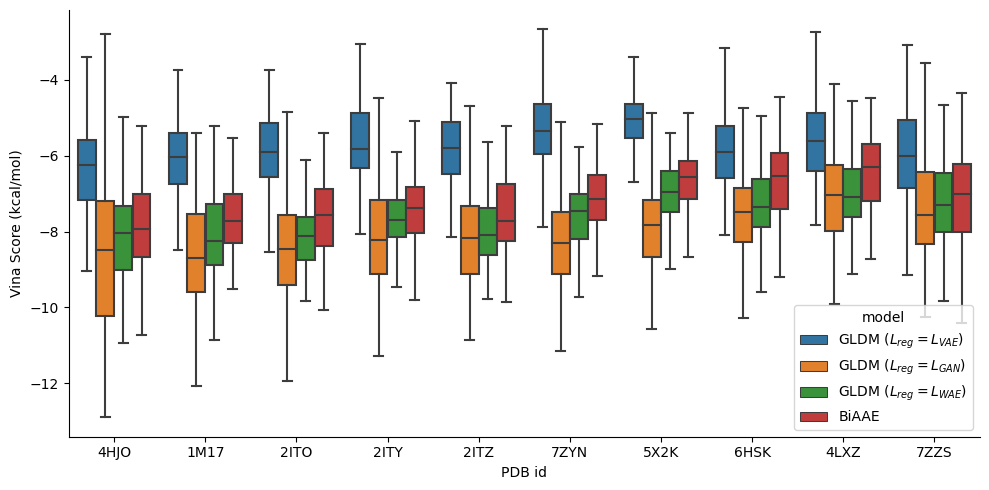

In [21]:
# fig, ax = plt.subplots(figsize=(12,6))
box_plot = sns.catplot(data=dfs2, x="PDB id", y="Vina Score (kcal/mol)", hue="model", kind="box", height=5, aspect=2, legend_out=False, showfliers=False)
# plt.title('')

In [22]:
# box_plot.savefig('../plots/binding_affinity_all.png')